In [63]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import scipy
import netCDF4 as nc
import datetime as dt
import cmocean
import string
import glob
from salishsea_tools import viz_tools, places
from salishsea_tools import evaltools as et
import scipy.stats as sst
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.ndimage import gaussian_filter
from matplotlib.ticker import FormatStrFormatter
import pickle

import NorthNut as nn

%matplotlib inline

In [3]:
ig0=nn.ig0
ig1=nn.ig1
jg0=nn.jg0
jg1=nn.jg1
tmaskDIAN=nn.tmask
umaskDIAN=nn.umask
vmaskDIAN=nn.vmask

In [4]:
sdir='/data/eolson/MEOPAR/SS36runs/linkHC201812/'
saveloc='/data/eolson/MEOPAR/biomodelevalpaper/response/figsNNut/'
fformat0='%Y%m%d'
fformatM='%d%b%y'

In [5]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]

In [6]:
np.cumsum(e3t_0[0,:,0,0])

array([  1.00000115,   2.00000617,   3.0000187 ,   4.00004588,
         5.00010158,   6.00021283,   7.00043229,   8.00086249,
         9.00170316,  10.00334329,  11.00654039,  12.01276953,
        13.02490224,  14.04852581,  15.09450132,  16.18390193,
        17.35746621,  18.6933952 ,  20.33976301,  22.56966586,
        25.86215152,  30.98213661,  38.95665167,  50.78194888,
        66.88986931,  86.84857189, 109.66180445, 134.30253643,
       160.00585122, 186.29270105, 212.8899897 , 239.64964307,
       266.4934601 , 293.38070223, 320.2902963 , 347.21138124,
       374.13836974, 401.06839028, 427.9999678 , 454.93234477])

In [7]:
# try 5/14 for  basic fig
iit=dt.datetime(2015,5,14)
fname=iit.strftime(fformatM).lower()+'/SalishSea_1h_*ptrc_T.nc'
fb=nc.Dataset(glob.glob(sdir+fname)[0])
i0=111
i1=208
j0=635
j1=798

In [8]:
ie1=127
je1=715
ie2=133
je2=690
ic=148
jc=730
ic2=160
jc2=660
bgcol='olivedrab'
#cm0=cmocean.cm.thermal
cm0=mpl.cm.get_cmap('Oranges')
col1='blueviolet'
col2='green'
colc='black'
colc2='cornflowerblue'

In [9]:
t0=dt.datetime(2015,1,1) # 1st start date of run
te=dt.datetime(2016,1,1)# last start date of run
recalc=False
if recalc==True:
    ilen=(te-t0).days+1
    means1=np.zeros((ilen))
    means2=np.zeros((ilen))
    meansc=np.zeros((ilen))
    meansc2=np.zeros((ilen))
    maxs1=np.zeros((ilen))
    maxs2=np.zeros((ilen))
    maxsc=np.zeros((ilen))
    maxsc2=np.zeros((ilen))
    all1=np.zeros((ilen*24))
    all2=np.zeros((ilen*24))
    allc=np.zeros((ilen*24))
    allc2=np.zeros((ilen*24))
    iitime=list()
    iits=t0
    iii=0
    while iits<=te:
        iitime.append(iits)
        with nc.Dataset(glob.glob(sdir+iits.strftime(fformatM).lower()+'/SalishSea_1h_*ptrc_T.nc')[0]) as fi:
            means1[iii]=np.mean(fi.variables['nitrate'][:,0,je1,ie1])
            means2[iii]=np.mean(fi.variables['nitrate'][:,0,je2,ie2])
            meansc[iii]=np.mean(fi.variables['nitrate'][:,0,jc,ic])
            meansc2[iii]=np.mean(fi.variables['nitrate'][:,0,jc2,ic2])
            maxs1[iii]=np.max(fi.variables['nitrate'][:,0,je1,ie1])
            maxs2[iii]=np.max(fi.variables['nitrate'][:,0,je2,ie2])
            maxsc[iii]=np.max(fi.variables['nitrate'][:,0,jc,ic])
            maxsc2[iii]=np.max(fi.variables['nitrate'][:,0,jc2,ic2])
            all1[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,je1,ie1]
            all2[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,je2,ie2]
            allc[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,jc,ic]
            allc2[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,jc2,ic2]
        iii=iii+1
        iits=iits+dt.timedelta(days=1)
    iitime=np.array(iitime)
    with open('../../save/showPatternVars.pkl','wb') as ff:
        pickle.dump([iitime,means1,means2,meansc,meansc2,maxs1,maxs2,maxsc,maxsc2,all1,all2,allc,allc2],ff)
else:
    ilen=(te-t0).days+1
    with open('../../save/showPatternVars.pkl','rb') as ff:
        [iitime,means1,means2,meansc,meansc2,maxs1,maxs2,maxsc,maxsc2,all1,all2,allc,allc2]=pickle.load(ff)

In [10]:
it2=[t0+dt.timedelta(hours=hh) for hh in range(0,ilen*24)]
it2=np.array(it2)

In [11]:
jiSS=places.PLACES['Sentry Shoal']['NEMO grid ji']

In [12]:
saveloc2='../../save/'
wind=np.load(saveloc2+'saveWindSentryShoal.npz')

In [13]:
np.shape(e1t)
xx=np.cumsum(e1t[0,:,:],0)/1e3
yy=np.cumsum(e2t[0,:,:],1)/1e3

14 May 2015 10:30 UTC
Bbox(x0=0.05, y0=0.21410698308273762, x1=0.1950801450801451, y1=0.6229300539542995)
0.20467165213416655


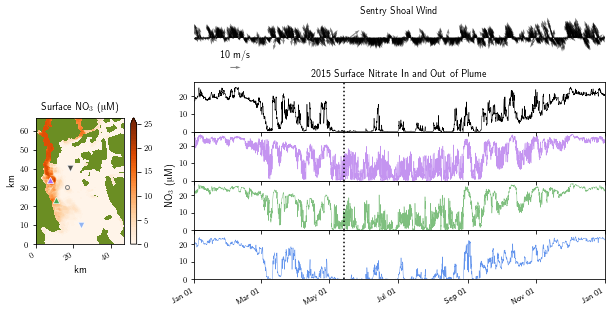

In [14]:
ih=10
iit=dt.datetime(1900,1,1)+dt.timedelta(seconds=fb.variables['time_centered'][:][ih])

fig = plt.figure(figsize=(8.5,4.3))
gs1 = gridspec.GridSpec(6,2,left=.05,right=.98,hspace=0,wspace=.22,bottom=0.1,top=.96,width_ratios=[1,4],height_ratios=[2,.8,2,2,2,2])
gs0=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs1[2:,0],width_ratios=[10,1],wspace=.1)
gsc=gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs0[0,1],height_ratios=[.1,1,.1],wspace=.3)
#gs1=gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs1[1:],height_ratios=[.5,1,.5],wspace=.1)
cbax=fig.add_subplot(gsc[1, 0])
cbax.set_aspect(20/1)
ax0=fig.add_subplot(gs0[0])
ax2=fig.add_subplot(gs1[0,1])
axa=fig.add_subplot(gs1[2,1])
axb=fig.add_subplot(gs1[3,1])
axc=fig.add_subplot(gs1[4,1])
axd=fig.add_subplot(gs1[5,1])
ax0.set_aspect(1)
#viz_tools.set_aspect(ax0)
ax0.set_facecolor(bgcol)

iax=ax0 # fig 0: Nitrate
kk=0
clim=(0,25)
mesh0=ax0.contourf(yy[j0:j1,i0:i1]-yy[j0,i0],xx[j0:j1,i0:i1]-xx[j0,i0],
                   np.ma.masked_where(tmask[0,kk,j0:j1,i0:i1]==0,fb.variables['nitrate'][ih,kk,j0:j1,i0:i1]),
                   np.linspace(clim[0],clim[1],50),vmin=clim[0],vmax=clim[1],
                         cmap=cm0,extend='max')
cb=fig.colorbar(mesh0,cax=cbax,ticks=np.linspace(clim[0],clim[1],6))
#test=cb.ax.yaxis.get_ticklabels()
#test[0].set_text(u'\u2264{}'.format(test[0].get_text()))
#test[-1].set_text(u'\u2265{}'.format(test[-1].get_text()))
#cb.ax.yaxis.set_ticklabels(test)
ax0.set_title('Surface NO$_3$ ($\muup$M)',fontsize=10)
print(iit.strftime('%d %b %Y %H:%M UTC'))
#ax0.set_xticks([],[]);
#ax0.set_yticks([],[]); 
ie1k=xx[je1,ie1]-xx[j0,i0]
je1k=yy[je1,ie1]-yy[j0,i0]
ie2k=xx[je2,ie2]-xx[j0,i0]
je2k=yy[je2,ie2]-yy[j0,i0]
ic1k=xx[jc,ic]-xx[j0,i0]
jc1k=yy[jc,ic]-yy[j0,i0]
ic2k=xx[jc2,ic2]-xx[j0,i0]
jc2k=yy[jc2,ic2]-yy[j0,i0]
iSSk=xx[jiSS[0],jiSS[1]]-xx[j0,i0]
jSSk=yy[jiSS[0],jiSS[1]]-yy[j0,i0]
ax0.plot(je1k,ie1k,'^',color='w',)
ax0.plot(je1k,ie1k,'^',color=col1,markeredgecolor='w',markeredgewidth=.5,alpha=.7)
ax0.plot(je2k,ie2k,'^',color='w',markeredgecolor='w')
ax0.plot(je2k,ie2k,'^',color=col2,markeredgecolor='w',markeredgewidth=.5,alpha=.7)
ax0.plot(jc1k,ic1k,'v',color='w')
ax0.plot(jc1k,ic1k,'v',color=colc,markeredgecolor='w',markeredgewidth=.5,alpha=.7)
ax0.plot(jc2k,ic2k,'v',color='w')
ax0.plot(jc2k,ic2k,'v',color=colc2,markeredgecolor='w',markeredgewidth=.5,alpha=.7)
ax0.plot(jSSk,iSSk,'o',color='none',markeredgecolor='grey',ms=4)
ax0.set_xlabel('km',fontsize=10)
ax0.set_ylabel('km',fontsize=10)
ax0.set_xlim((0,47))
ax0.set_ylim((0,67))
axb.plot(it2,all1,'-',color=col1,alpha=.5,linewidth=.5)
axc.plot(it2,all2,'-',color=col2,alpha=.5,linewidth=.5)
axa.plot(it2,allc,'-',color=colc,alpha=1,linewidth=.5)
axd.plot(it2,allc2,'-',color=colc2,alpha=1,linewidth=.5)
ms1=6
#axa.plot(iit,fb.variables['nitrate'][ih,kk,je1,ie1],'^',color='w',markersize=ms1)
#axa.plot(iit,fb.variables['nitrate'][ih,kk,je1,ie1],'^',color=col1,markeredgecolor='w',markeredgewidth=.5,markersize=ms1,alpha=.7)
#axb.plot(iit,fb.variables['nitrate'][ih,kk,je2,ie2],'^',color='w',markersize=ms1)
#axb.plot(iit,fb.variables['nitrate'][ih,kk,je2,ie2],'^',color=col2,markeredgecolor='w',markeredgewidth=.5,markersize=ms1,alpha=.7)
#axc.plot(iit,fb.variables['nitrate'][ih,kk,jc,ic],'v',color='w',markersize=ms1)
#axc.plot(iit,fb.variables['nitrate'][ih,kk,jc,ic],'v',color=colc,markeredgecolor='w',markeredgewidth=.5,markersize=ms1,alpha=.7)
#axd.plot(iit,fb.variables['nitrate'][ih,kk,jc2,ic2],'v',color='w',markersize=ms1)
#axd.plot(iit,fb.variables['nitrate'][ih,kk,jc2,ic2],'v',color=colc2,markeredgecolor='w',markeredgewidth=.5,markersize=ms1,alpha=.7)
for iax in (axa,axb,axc,axd):
    iax.set_xlim(t0,te)
    iax.plot((iit,iit),(0,28),'k:')
    iax.set_ylim(0,28)
    iax.patch.set_alpha(0)
axa.set_title('2015 Surface Nitrate In and Out of Plume',fontsize=10)
fig.autofmt_xdate(bottom=0.3, rotation=30, ha='right')
yearsFmt = mdates.DateFormatter('%b %d')
axd.xaxis.set_major_formatter(yearsFmt)
axb.set_ylabel('NO$_3$ ($\muup$M)',fontsize=10)
axb.yaxis.set_label_coords(-.045,-.08)

q=ax2.quiver(wind['winddatenum'][1::3], np.zeros(wind['winddatenum'][1::3].shape), wind['us'][1::3], wind['vs'][1::3],scale=400,alpha=.5)
ax2.set_xlim(wind['winddatenum'].min(),wind['winddatenum'].max())
qk = ax2.quiverkey(q, 0.1, -0.1, 10, '10 m/s',fontproperties={'size':10})
ax2.set_title('Sentry Shoal Wind',fontsize=10,pad=-.05)
ax2.set_axis_off()
#ax1.patch.set_alpha(0)
xp0=ax0.get_position()
xpc=cbax.get_position()
print(xp0)
print(xpc.x0)
cbax.set_position(mpl.transforms.Bbox([[xpc.x0,xp0.y0],[xpc.x1,xp0.y1]]))
#ax1.set_position(mpl.transforms.Bbox.from_extents(0.32, 0.2, 0.99, 0.7))
#tmp=ax1.get_position()
#print(tmp)
#fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/figsNNut/showPatternWindR.png',dpi = 400, transparent=False)
#fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/figsNNut/showPatternWindR.eps',dpi = 400, transparent=False)

In [27]:
# may 1 to sep 1
((dt.datetime(2015,5,1)-dt.datetime(2015,1,1)).total_seconds()/3600,
(dt.datetime(2015,9,1)-dt.datetime(2015,1,1)).total_seconds()/3600)

(2880.0, 5832.0)

In [65]:
from scipy import signal

In [81]:
5832-2880

2952

In [82]:
2952/24

123.0

In [115]:
2952/12

246.0

In [119]:
256/23,12*23

(11.130434782608695, 276)

In [97]:
2952/4

738.0

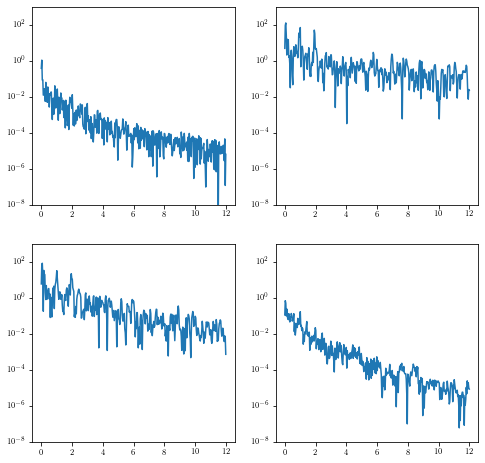

In [101]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()
args={'window':'hamming','detrend':'linear','nfft':738,'scaling':'density'}
fc,Pxxc=signal.periodogram(allc[2880:5832],24,**args)
ax[0].semilogy(fc,Pxxc)
f1,Pxx1=signal.periodogram(all1[2880:5832],24,**args)
ax[1].semilogy(f1,Pxx1)
f2,Pxx2=signal.periodogram(all2[2880:5832],24,**args)
ax[2].semilogy(f2,Pxx2)
fc2,Pxxc2=signal.periodogram(allc2[2880:5832],24,**args)
ax[3].semilogy(fc2,Pxxc2)
for iax in ax:
    iax.set_ylim(1e-8,1e3)

In [105]:
23*11

253

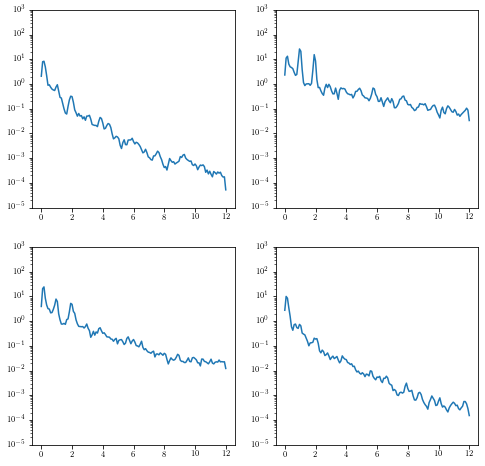

In [120]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()
args={'window':'hamming','nperseg':246,'noverlap':int(256/2),'nfft':276,'detrend':'linear',
     'scaling':'density'}
fc,Pxxc=signal.welch(allc[2880:5832],24,**args)
ax[0].semilogy(fc,Pxxc)
f1,Pxx1=signal.welch(all1[2880:5832],24,**args)
ax[1].semilogy(f1,Pxx1)
f2,Pxx2=signal.welch(all2[2880:5832],24,**args)
ax[2].semilogy(f2,Pxx2)
fc2,Pxxc2=signal.welch(allc2[2880:5832],24,**args)
ax[3].semilogy(fc2,Pxxc2)
for iax in ax:
    iax.set_ylim(1e-5,1e3)

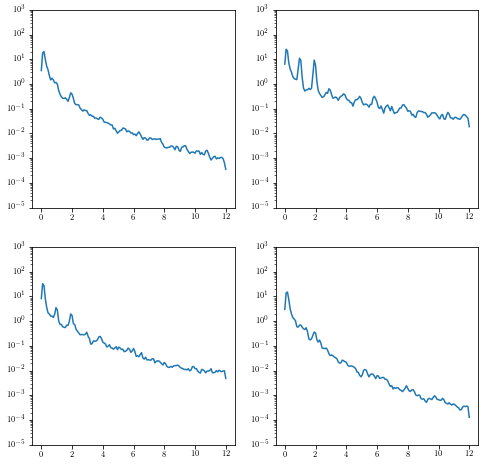

In [121]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()
args={'window':'hamming','nperseg':246,'noverlap':int(256/2),'nfft':276,'detrend':'linear',
     'scaling':'density'}
fc,Pxxc=signal.welch(allc,24,**args)
ax[0].semilogy(fc,Pxxc)
f1,Pxx1=signal.welch(all1,24,**args)
ax[1].semilogy(f1,Pxx1)
f2,Pxx2=signal.welch(all2,24,**args)
ax[2].semilogy(f2,Pxx2)
fc2,Pxxc2=signal.welch(allc2,24,**args)
ax[3].semilogy(fc2,Pxxc2)
for iax in ax:
    iax.set_ylim(1e-5,1e3)

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()

ax[0].psd(allc[2880:5832],NFFT=len(allc[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)

ax[1].psd(all1[2880:5832],NFFT=len(all1[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)

ax[2].psd(all2[2880:5832],NFFT=len(all2[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)

ax[3].psd(allc2[2880:5832],NFFT=len(allc2[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)
for iax in ax:
    iax.set_ylim(-60,10)
#    iax.set_xlim(0,6)

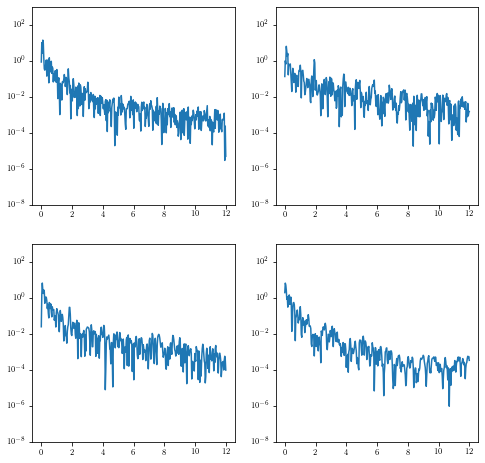

In [103]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()
args={'window':'hanning','detrend':'linear','nfft':738,'scaling':'density'}
fc,Pxxc=signal.periodogram(allc,24,**args)
ax[0].semilogy(fc,Pxxc)
f1,Pxx1=signal.periodogram(all1,24,**args)
ax[1].semilogy(f1,Pxx1)
f2,Pxx2=signal.periodogram(all2,24,**args)
ax[2].semilogy(f2,Pxx2)
fc2,Pxxc2=signal.periodogram(allc2,24,**args)
ax[3].semilogy(fc2,Pxxc2)
for iax in ax:
    iax.set_ylim(1e-8,1e3)

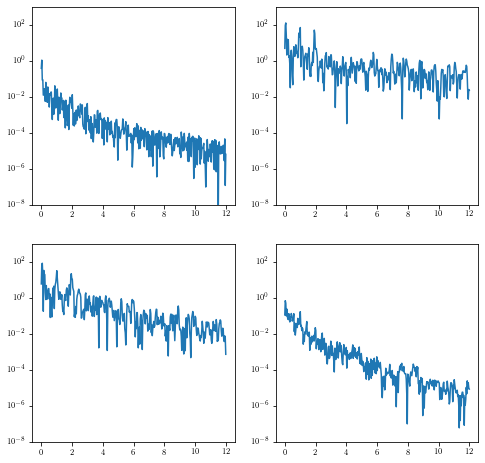

In [99]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()
args={'window':'hamming','detrend':'linear','nfft':738,'scaling':'density'}
fc,Pxxc=signal.periodogram(allc[2880:5832],24,**args)
ax[0].semilogy(fc,Pxxc)
f1,Pxx1=signal.periodogram(all1[2880:5832],24,**args)
ax[1].semilogy(f1,Pxx1)
f2,Pxx2=signal.periodogram(all2[2880:5832],24,**args)
ax[2].semilogy(f2,Pxx2)
fc2,Pxxc2=signal.periodogram(allc2[2880:5832],24,**args)
ax[3].semilogy(fc2,Pxxc2)
for iax in ax:
    iax.set_ylim(1e-8,1e3)

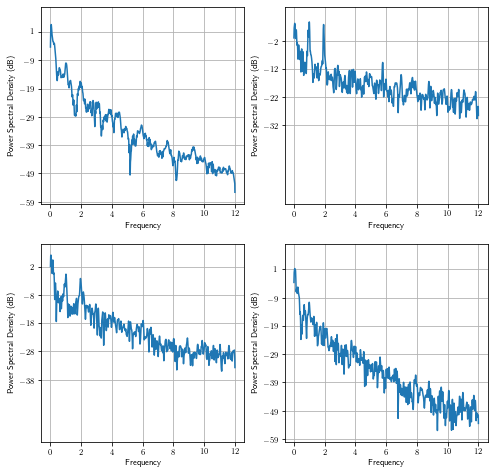

In [62]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()
ax[0].psd(allc[2880:5832],NFFT=len(allc[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)

ax[1].psd(all1[2880:5832],NFFT=len(all1[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)

ax[2].psd(all2[2880:5832],NFFT=len(all2[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)

ax[3].psd(allc2[2880:5832],NFFT=len(allc2[2880:5832])/4, pad_to=len(allc[2880:5832]),Fs=24,detrend='mean',scale_by_freq=False)
for iax in ax:
    iax.set_ylim(-60,10)
#    iax.set_xlim(0,6)

(array([7.39865873e+03, 1.23168794e+04, 1.46256183e+03, ...,
        3.27352795e-04, 2.44284224e-04, 8.30747924e-05]),
 array([0.00000000e+00, 2.73224044e-03, 5.46448087e-03, ...,
        1.19945355e+01, 1.19972678e+01, 1.20000000e+01]))

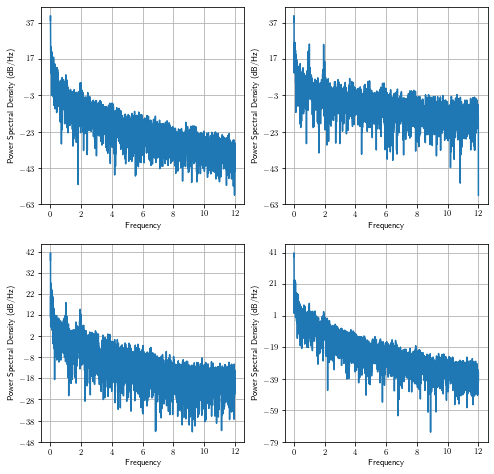

In [48]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax=ax.flatten()
ax[0].psd(allc,NFFT=len(allc), pad_to=len(allc),Fs=24,detrend='mean')

ax[1].psd(all1,NFFT=len(all1), pad_to=len(allc),Fs=24,detrend='mean')

ax[2].psd(all2,NFFT=len(all2), pad_to=len(allc),Fs=24,detrend='mean')

ax[3].psd(allc2,NFFT=len(allc2), pad_to=len(allc),Fs=24,detrend='mean')
#for iax in ax:
#    iax.set_xlim(0,6)

In [14]:
wind.files

['vs', 'us', 'winddatenum', 'direc', 'wind']

In [15]:
len(wind['vs'])

8784

In [16]:
len(allc2)

8784

### wind correlations

comments: stick with wind magnitude; otherwise direction issues complicate things- see first set of correlation plots 

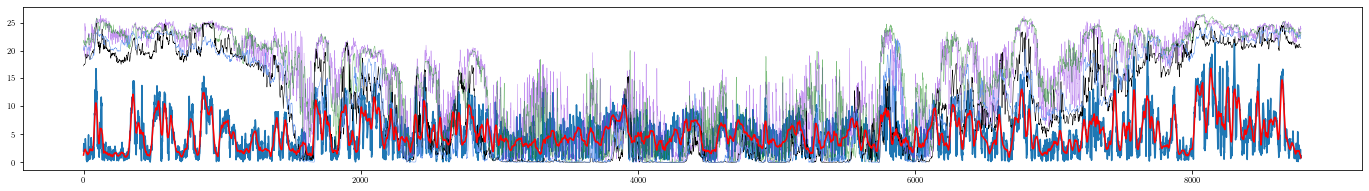

In [17]:
fig,ax=plt.subplots(1,1,figsize=(24,3))
ax.plot(wind['wind'])#it2,
w2=np.convolve(wind['wind'], np.ones((24,))/24, mode='same') # do not use edges!
ax.plot(all1,'-',color=col1,alpha=.5,linewidth=.5)
ax.plot(all2,'-',color=col2,alpha=.5,linewidth=.5)
ax.plot(allc,'-',color=colc,alpha=1,linewidth=.5)
ax.plot(allc2,'-',color=colc2,alpha=1,linewidth=.5)
ax.plot(w2,'r-')

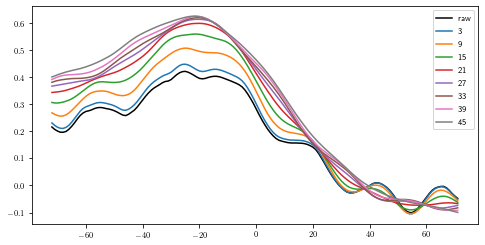

In [18]:
## correlations: wind speed
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
for ii in range(-72,72):
    iis.append(ii)
    x=wind['wind'][(ist+ii):(ien+ii)]
    y=allc[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
for iw in range(3,48,6):
    w2=np.convolve(wind['wind'], np.ones((iw,))/iw, mode='same')
    rsP2=list()
    for ii in range(-72,72):
        x=w2[(ist+ii):(ien+ii)]
        y=allc[ist:ien]
        rsP2.append(sst.pearsonr(x,y)[0])
    ax.plot(iis,rsP2,label=str(iw))
plt.legend()

-21 0.6123481045721185 rsquared: 0.3749702011730662
(0.5846595043246411, 4.943620497130074e-10)


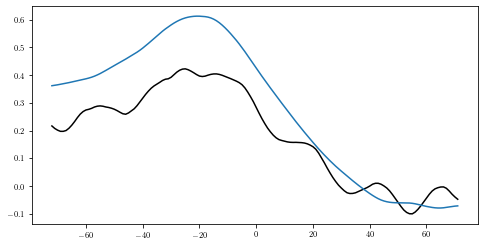

In [19]:
## allc
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
for ii in range(-72,72):
    iis.append(ii)
    x=wind['wind'][(ist+ii):(ien+ii)]
    y=allc[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
w2=np.convolve(wind['wind'], np.ones((25,))/25, mode='same')
rsP2=list()
for ii in range(-72,72):
    x=w2[(ist+ii):(ien+ii)]
    y=allc[ist:ien]
    rsP2.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP2)
iii=np.argmax(rsP2)
print(iis[iii],rsP2[iii],'rsquared:',rsP2[iii]*rsP2[iii])
x=w2[(ist+iis[iii]):(ien+iis[iii])]
y=allc[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))
# the window length is 25, so it extends for 12 hours before and after the central time which is 21 hours earlier, ie from -33 hours to -9 hours

-21 0.6092634464030988 rsquared: 0.37120194712298166
(0.58266217187335, 5.846005960379943e-10)


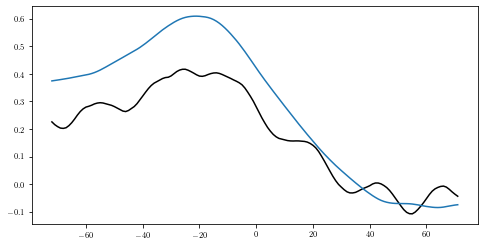

In [20]:
## allc, v wind component abs val only
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
for ii in range(-72,72):
    iis.append(ii)
    x=np.abs(wind['vs'][(ist+ii):(ien+ii)])
    y=allc[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
w2=np.convolve(np.abs(wind['vs']), np.ones((25,))/25, mode='same')
rsP2=list()
for ii in range(-72,72):
    x=w2[(ist+ii):(ien+ii)]
    y=allc[ist:ien]
    rsP2.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP2)
iii=np.argmax(np.abs(rsP2))
print(iis[iii],rsP2[iii],'rsquared:',rsP2[iii]*rsP2[iii])
x=w2[(ist+iis[iii]):(ien+iis[iii])]
y=allc[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))
# the window length is 25, so it extends for 12 hours before and after the central time which is 21 hours earlier, ie from -33 hours to -9 hours

-16 0.44473998738842374 rsquared: 0.1977936563822553
(0.4177830613441418, 2.5258958538088622e-05)


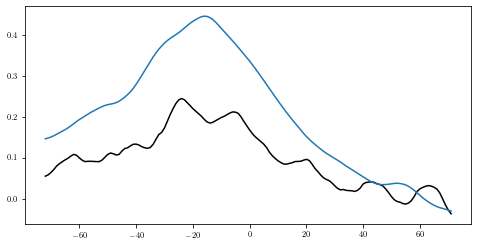

In [21]:
## allc, u wind component abs val only
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
for ii in range(-72,72):
    iis.append(ii)
    x=np.abs(wind['us'][(ist+ii):(ien+ii)])
    y=allc[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
w2=np.convolve(np.abs(wind['us']), np.ones((25,))/25, mode='same')
rsP2=list()
for ii in range(-72,72):
    x=w2[(ist+ii):(ien+ii)]
    y=allc[ist:ien]
    rsP2.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP2)
iii=np.argmax(np.abs(rsP2))
print(iis[iii],rsP2[iii],'rsquared:',rsP2[iii]*rsP2[iii])
x=w2[(ist+iis[iii]):(ien+iis[iii])]
y=allc[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))
# the window length is 25, so it extends for 12 hours before and after the central time which is 21 hours earlier, ie from -33 hours to -9 hours

-16 0.6191550070683631 rsquared: 0.3833529227778248
(0.5706666246824883, 1.563141410353114e-09)


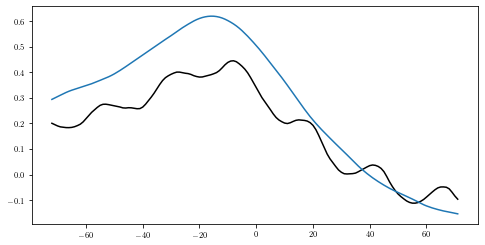

In [22]:
## allc2
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
for ii in range(-72,72):
    iis.append(ii)
    x=wind['wind'][(ist+ii):(ien+ii)]
    y=allc2[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
w2=np.convolve(wind['wind'], np.ones((25,))/25, mode='same')
rsP2=list()
for ii in range(-72,72):
    x=w2[(ist+ii):(ien+ii)]
    y=allc2[ist:ien]
    rsP2.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP2)
iii=np.argmax(rsP2)
print(iis[iii],rsP2[iii],'rsquared:',rsP2[iii]*rsP2[iii])
x=w2[(ist+iis[iii]):(ien+iis[iii])]
y=allc2[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))
# the window length is 25, so it extends for 12 hours before and after the central time which is 16 hours earlier, ie from -28 hours to -4 hours

-12 0.06394865702827257 rsquared: 0.004089430735719635
(-0.05046334100575578, 0.6272124238689344)


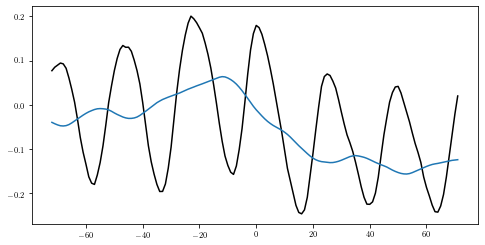

In [23]:
## all1
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
for ii in range(-72,72):
    iis.append(ii)
    x=wind['wind'][(ist+ii):(ien+ii)]
    y=all1[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
w2=np.convolve(wind['wind'], np.ones((25,))/25, mode='same')
rsP2=list()
for ii in range(-72,72):
    x=w2[(ist+ii):(ien+ii)]
    y=all1[ist:ien]
    rsP2.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP2)
iii=np.argmax(rsP2)
print(iis[iii],rsP2[iii],'rsquared:',rsP2[iii]*rsP2[iii])
x=w2[(ist+iis[iii]):(ien+iis[iii])]
y=all1[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))

-11 0.06690871195280013 rsquared: 0.004476775735182778
(0.09405217344796504, 0.36462718584974807)


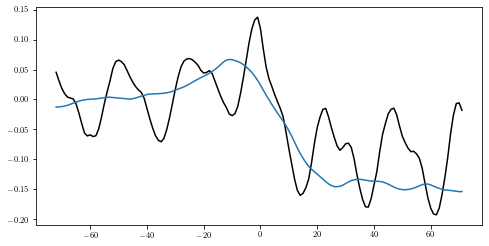

In [24]:
## all2
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
for ii in range(-72,72):
    iis.append(ii)
    x=wind['wind'][(ist+ii):(ien+ii)]
    y=all2[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
w2=np.convolve(wind['wind'], np.ones((25,))/25, mode='same')
rsP2=list()
for ii in range(-72,72):
    x=w2[(ist+ii):(ien+ii)]
    y=all2[ist:ien]
    rsP2.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP2)
iii=np.argmax(rsP2)
print(iis[iii],rsP2[iii],'rsquared:',rsP2[iii]*rsP2[iii])
x=w2[(ist+iis[iii]):(ien+iis[iii])]
y=all2[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))

### tidal velocity correlation

In [25]:
start=dt.datetime(2015,5,12) # use even number of fortnights (6, end is included)
end=dt.datetime(2015,8,23) # end quickly for now- calculations too long
mod_basedir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
mod_basedir_GLS='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/GLS_Summer15/'
mod_nam_fmt='nowcast'
mod_nam_fmt_GLS='long'
mod_flen=1
mod_flen_GLS=10
saveloc='/data/eolson/results/MEOPAR/SS36runs/calcFiles/NTransport/'
fver='HC201812'

In [26]:
# load from hindcast
fliste3t=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'carp_T',1)
flistU=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_U',1)
flistV=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_V',1)
flistW=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_W',1)
flistT=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_T',1)
flistB=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'ptrc_T',1)
flistNW=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_W',1)
flistNU=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_U',1)
flistNV=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_V',1)
flistR=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'prod_T',1)

ftype=dian_W, are you sure? (if yes, add to list)
ftype=dian_U, are you sure? (if yes, add to list)
ftype=dian_V, are you sure? (if yes, add to list)
ftype=prod_T, are you sure? (if yes, add to list)


In [27]:
def vvl_interp_T_to_V(pe3_in,e1v,e2v,e1t,e2t,vmask,e3t_0,e3v_0):
    # see isobathPanels-Fig
    # keep extra dimensions in mesh variables
    e12v = e1v[0,:,:]*e2v[0,:,:]
    e12t = e1t[0,:,:]*e2t[0,:,:]
    pe3_out=np.zeros(np.shape(pe3_in))
    pe3_out[:,:,:-1,:-1]=.5*vmask[:,:,:-1,:-1]/e12v[:-1,:-1]*(e12t[:-1,:-1]*(pe3_in[:,:,:-1,:-1]-e3t_0[:,:,:-1,:-1])+e12t[1:,:-1]*(pe3_in[:,:,1:,:-1]-e3t_0[:,:,1:,:-1]))
    pe3_out=pe3_out+e3v_0
    return pe3_out

In [28]:
mesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
#bathyf=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
vmask=mesh.variables['vmask'][:,:,:,:]
e1t=mesh.variables['e1t'][:,:,:]
e2t=mesh.variables['e2t'][:,:,:]
e1v=mesh.variables['e1v'][:,:,:]
e2v=mesh.variables['e2v'][:,:,:]
e3t_0=mesh.variables['e3t_0'][:,:,:,:]
e3v_0=mesh.variables['e3v_0'][:,:,:,:]
mesh.close()

In [29]:
test=vvl_interp_T_to_V(e3t_0,e1v,e2v,e1t,e2t,vmask,e3t_0,e3v_0)

In [ ]:
vti=list()
sti=list()
for iif in range(0,len(flistV)):
    if (iif%10)==0:
        print('iif=',iif)  
    with nc.Dataset(fliste3t.loc[iif,['paths']].values[0]) as fC,\
            nc.Dataset(flistV.loc[iif,['paths']].values[0]) as fV,\
              nc.Dataset(flistT.loc[iif,['paths']].values[0]) as fT:
        # extract fields to numpy variables for faster transect extraction:
        sshe=np.copy(fT.variables['sossheig'][:,jg0:jg1,ig0:ig1])
        e3te=np.copy(fC.variables['e3t'][:,:,jg0:jg1,ig0:ig1])
        vvele=np.copy(fV.variables['vomecrty'][:,:,jg0:jg1,ig0:ig1])
    e3v=vvl_interp_T_to_V(e3te,e1v[:,jg0:jg1,ig0:ig1],e2v[:,jg0:jg1,ig0:ig1],e1t[:,jg0:jg1,ig0:ig1],
                          e2t[:,jg0:jg1,ig0:ig1],vmask[:,:,jg0:jg1,ig0:ig1],e3t_0[:,:,jg0:jg1,ig0:ig1],e3v_0[:,:,jg0:jg1,ig0:ig1])
    # 1st extract Discovery mouth transect for diagnosing tidal phase:
    vti.append(np.sum(np.sum(vmaskDIAN[:26,93,9:16]*vvele[:,:26,93,9:16]*e3v[:,:26,93,9:16],2),1)/np.sum(np.sum(e3v[:,:26,93,9:16],2),1))
    sti.append(np.sum(tmaskDIAN[0,93,9:16]*sshe[:,93,9:16],1)/np.sum(tmaskDIAN[0,93,9:16]))
vt=np.concatenate(vti,axis=0)
st=np.concatenate(sti,axis=0)
del vti, sti

iif= 0
iif= 10


In [ ]:
tv=np.array([start+dt.timedelta(hours=ii) for ii in range(0,int((end-start).total_seconds()/3600+24))])

In [ ]:
plt.plot(vt)
len(vt),len(allc[ist:ien]),len(tv)

In [ ]:
## allc
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
istv=np.argmin(np.abs(dt.datetime(2015,5,15)-tv)) # on
ienv=np.argmin(np.abs(dt.datetime(2015,8,21)-tv)) # off
for ii in range(-24,24):
    iis.append(ii)
    x=vt[(istv+ii):(ienv+ii)]
    y=allc[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
iii=np.argmax(rsP)
print(iis[iii],rsP[iii],'rsquared:',rsP[iii]*rsP[iii])
x=vt[(istv+iis[iii]):(ienv+iis[iii])]
y=allc[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))

In [ ]:
## allc2
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
istv=np.argmin(np.abs(dt.datetime(2015,5,15)-tv)) # on
ienv=np.argmin(np.abs(dt.datetime(2015,8,21)-tv)) # off
for ii in range(-24,24):
    iis.append(ii)
    x=vt[(istv+ii):(ienv+ii)]
    y=allc2[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
iii=np.argmax(rsP)
print(iis[iii],rsP[iii],'rsquared:',rsP[iii]*rsP[iii])
x=vt[(istv+iis[iii]):(ienv+iis[iii])]
y=allc2[ist:ien]
print(sst.pearsonr(x[::25],y[::25]))

In [ ]:
## all1
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
istv=np.argmin(np.abs(dt.datetime(2015,5,15)-tv)) # on
ienv=np.argmin(np.abs(dt.datetime(2015,8,21)-tv)) # off
for ii in range(-12,12):
    iis.append(ii)
    x=vt[(istv+ii):(ienv+ii)]
    y=all1[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
iii=np.argmax(rsP)
print(iis[iii],rsP[iii],'rsquared:',rsP[iii]*rsP[iii])
x=vt[(istv+iis[iii]):(ienv+iis[iii])]
y=all1[ist:ien]
print(sst.pearsonr(x[::3],y[::3]))

In [ ]:
## all2
fig,ax=plt.subplots(1,1,figsize=(8,4))
rsP=list()
iis=list()
ist=np.argmin(np.abs(dt.datetime(2015,5,15)-it2)) # on
ien=np.argmin(np.abs(dt.datetime(2015,8,21)-it2)) # off
istv=np.argmin(np.abs(dt.datetime(2015,5,15)-tv)) # on
ienv=np.argmin(np.abs(dt.datetime(2015,8,21)-tv)) # off
for ii in range(-12,12):
    iis.append(ii)
    x=vt[(istv+ii):(ienv+ii)]
    y=all2[ist:ien]
    rsP.append(sst.pearsonr(x,y)[0])
ax.plot(iis,rsP,'k-',label='raw')
iii=np.argmax(rsP)
print(iis[iii],rsP[iii],'rsquared:',rsP[iii]*rsP[iii])
x=vt[(istv+iis[iii]):(ienv+iis[iii])]
y=all2[ist:ien]
print(sst.pearsonr(x,y))
print(sst.pearsonr(x[::3],y[::3]))

### % of time NO3 below diatom half-saturation:
    - purple dot: all1
    - green dot: all2
    - black dot: allc
    - blue dot: allc2

In [ ]:
plt.plot(it2,all1)

In [ ]:
iii0=(it2>dt.datetime(2015,5,15))&(it2<dt.datetime(2015,8,21))

In [ ]:
np.sum(iii0)

In [ ]:
np.sum(iii0&(all1<2))/np.sum(iii0),np.sum(iii0&(all1<.1))/np.sum(iii0)

In [ ]:
np.sum(iii0&(all2<2))/np.sum(iii0),np.sum(iii0&(all2<.1))/np.sum(iii0)

In [ ]:
np.sum(iii0&(allc<2))/np.sum(iii0),np.sum(iii0&(allc<.1))/np.sum(iii0)

In [ ]:
np.sum(iii0&(allc2<2))/np.sum(iii0),np.sum(iii0&(allc2<.1))/np.sum(iii0)